# Part 1: k-Means Clustering
As the first part of the assignment the k-Means clustering algorithm has been implemented. The utilities for downloading a target image and loading that image is given in the file *data_ops.py*. The implementation of k-Means clustering is given in the file *k_means.py*. 
## Necessary Imports
As this implementation makes use of the implemented files *data_ops.py* and *k_means.py* they are imported initially. Other than that, the time and matplotlib libraries are used. Time module is mainly used to report the execution time and matplotlib module is used for visualization purposes.

In [1]:
%matplotlib inline
from data_ops import *
from k_means import *
import time
import matplotlib.pyplot as plt

## Loading the data
In order to use the data, it was downloaded using *data_ops.py* file. The data has been saved with the name **sample.jpg** on the directory **data**. The dimensions of the data is as follows.

In [2]:
# Loading the file
file_path = "data/sample.jpg"
sample = load_data(file_path)
print("DATA LOADED")
print("Shape of data: {}".format(sample.shape))

DATA LOADED
Shape of data: (435, 510, 3)


## Visualizing the data
As this assignment deals with a single image, in order to visualize it the following utility function is provided. The main purpose of this function is to visualize an image based on a 3D array of pixel values. This method expects a valid array of pixels to be able to visualized by matplotlib library (is data type is float, the pixels should be in range [0, 1] and if data type is integer tge pixels should be in the range [0, 255])

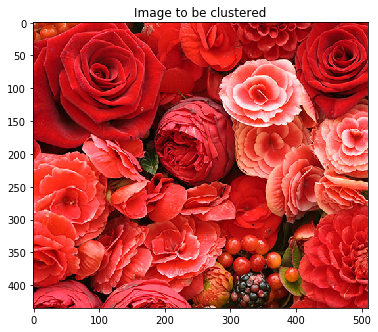

In [20]:
def visualize_image(data, title):
    data = np.array(data, dtype=np.int_)
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1)
    ax.set_title(title, fontsize=12)
    ax.imshow(data)
visualize_image(sample, "Image to be clustered")

## Data Normalization
In order to perform data normalization to try in the experiments, the follow,ing functions has been implemented. These functions perform data normalization and retrieving the original image from normalized data the respective functions are implemented. The normalization fomula is as follows where Z represents the normalized data.<br>
Normalization: $Z = \Large{\frac{X - \mu}{\sigma}}$ <br>
Converting to original image: $X = Z\sigma - \mu$ <br>
The implementations are given as follows:

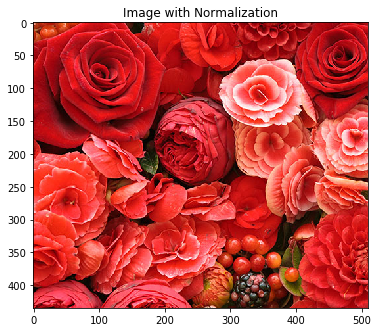

In [21]:
def normalize_data(data):
    axis = [i for i in range(len(data.shape) - 1)]
    data_mean = np.mean(data, axis=tuple(axis))
    data_std = np.std(data, axis=tuple(axis))
    return (data - data_mean) / data_std, data_mean, data_std

def denormalize_data(data, mean, std):
    return data * std + mean

normalized_sample, data_mean, data_std = normalize_data(sample)
visualize_image(denormalize_data(normalized_sample, data_mean, data_std), "Image with Normalization")

## Analysing the effect of the number of clusters
In order to perform an analysis that questions the effect of number of clusters in the algorithm, the following function is used. The function takes a set of k values representing the number of clusters and performs an analysis by measuring its computational time to fit the model and making an evaluation and clustering error.

In [5]:
def k_analysis(data, k_values):
    results = []
    for k in k_values:
        start = time.time()
        classifier = KMeansCluster(no_of_clusters=k)
        classifier.fit(data)
        error = classifier.evaluate(data)
        final_img = classifier.apply_model(sample)
        end = time.time()
        result = {"exec_time": end - start, "final_img": final_img, "error": error, "k": k, "centroids": classifier.centroids}
        results.append(result)
    return results
initial_results = k_analysis(sample, (2,3,4,5,6))

## Utility Functions
In order to perform the visualization of the results obtained after the analysis of the the utility functions implemented below are used. The utility functions perform the following tasks in the given order:
- Visualizing the clustered image
- Plot the change in the clustering error with changing amount of clusters
- Plot the change in the execution time with changing amount of clusters
- Visualizing the centroid values for different amount of clusters <br> <br>
All of these methods expect a results array that is formed by **k_analysis** method.

In [6]:
def show_result_img(results):
    fig, axes = plt.subplots(len(results), figsize=(6, 30))
    for img_idx in range(len(results)):
        axes[img_idx].imshow(results[img_idx]["final_img"].astype(int))
        axes[img_idx].set_title("Image clustered with K = {}".format(results[img_idx]["k"]))

def show_result_error(results):
    errors = []
    k_values = []
    for experiment in results:
        errors.append(experiment["error"])
        k_values.append(experiment["k"])
    plt.plot(k_values, errors)
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Clustering Error")
    plt.title("Clustering Error for changing K values")
    print("Error Values: {}".format(np.round(errors, 4)))

def show_result_time(results):
    times = []
    k_values = []
    for experiment in results:
        times.append(experiment["exec_time"])
        k_values.append(experiment["k"])
    plt.plot(k_values, times)
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Execution Time")
    plt.title("Execution Time for changing K values")
    print("Execution Times: {}".format(np.round(times, 4)))
    
def show_centroids(results):
    fig, axes = plt.subplots(len(results), figsize=(6,15))
    for experiment in range(len(results)):
        colors = results[experiment]["centroids"].astype(int)
        axes[experiment].set_title("Mean Vectors for K = {}".format(results[experiment]["k"]))
        axes[experiment].imshow(np.reshape(colors, (1, len(colors), colors.shape[-1])))
        print("Centroids for K = {}: {}".format(results[experiment]["k"], np.round(results[experiment]["centroids"], 2)))

## Change in Clustering Error
As expected the clustering error decreases as the number of clusters increase. By incrementing the amount of clusters, the centroids can generalize the sample data better that leads to smaller error value.

Error Values: [52.2083 41.7107 33.3258 28.8923 27.74  ]


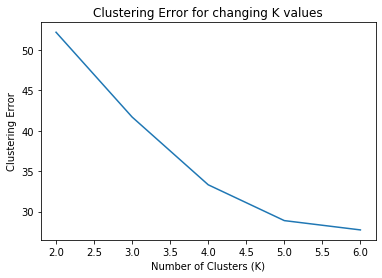

In [7]:
show_result_error(initial_results)

## Change in Execution Time
Considering that the execution time is dependent on the initial clusters, since they are selected randomly, there is a randomness in the execution time as it can be observed in the plot below. Using less clusters decrease the probability of taking longer but not guarantee it. This analysis also proves the randomess included in cluster initialization process.

Execution Times: [0.6882 1.3451 1.0648 2.0447 1.3545]


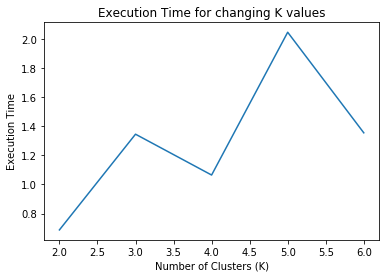

In [8]:
show_result_time(initial_results)

## Results obtained for $k \in (2,3,4,5,6)$
After perfoming the analysis regarding the change in the number of clusters and the clustering performance, the images obtained by obtaining the k-Means clıstering are visualized. As predicted, with increasing amount of clusters, clustered samples tend to show more details by their nature.

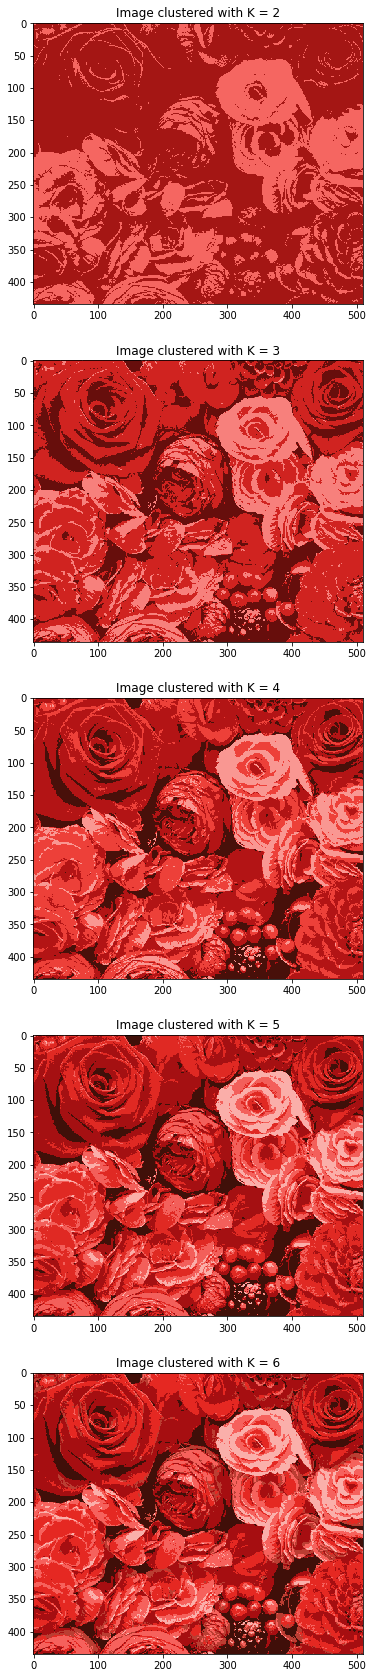

In [9]:
show_result_img(initial_results)

## Centroids (Centers of the learned clusters) for $k \in (2,3,4,5,6)$
In order to observe the variety of the clusters in ordet to understand how much detail they tend to reveal, the values of the centroids are visualized. As it can be observed from the visualized values, the clusters predicted are highly dominated by the majority points in the image. This fact can clearly be observed by the dominance of the red color in the learned clusters. The visualization of the centroids are as follows:

Centroids for K = 2: [[245.01 102.93  97.02]
 [164.47  22.69  20.87]]
Centroids for K = 3: [[208.02  35.89  32.79]
 [247.75 128.83 124.17]
 [103.34  14.5   12.3 ]]
Centroids for K = 4: [[179.5   20.36  21.04]
 [237.78  64.84  57.83]
 [ 72.29  16.17  10.32]
 [249.35 151.21 146.66]]
Centroids for K = 5: [[243.8   95.61  90.29]
 [ 64.59  16.38   9.74]
 [224.02  41.31  35.57]
 [250.65 174.25 169.24]
 [165.65  16.87  18.69]]
Centroids for K = 6: [[166.63  14.88  17.45]
 [ 64.59  15.87   9.46]
 [250.66 175.68 170.7 ]
 [229.26  40.02  34.49]
 [246.99  97.18  92.59]
 [187.49  61.16  50.21]]


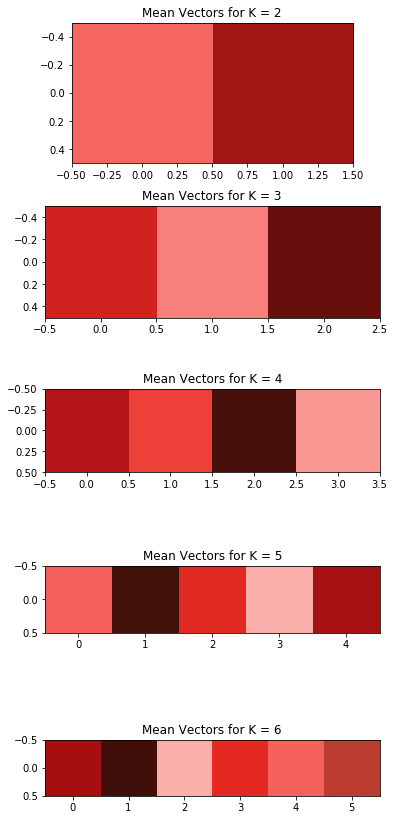

In [10]:
show_centroids(initial_results)

## Finding the optimal amount of clusters
In order to find the optimal amount of clusters, a variety of cluster amounts are tried. The attempted values are $k \in (2, 3, 4, 5, 6, 10, 15, 20, 30, 50, 100, 150, 200)$.

In [11]:
experiment_k_values = (2, 3, 4, 5, 6, 10, 15, 20, 30, 50, 100, 150, 200)
overall_results = k_analysis(sample, experiment_k_values)

The visualization of changing clustering errors are provided in the plot. After observing the plot, the optimal value for number of clusters are selected as 30, considering that when the number of clusters pass the number of natural clusters the drop in the clustering error will be small. The plot is given as follows.

Error Values: [52.2028 41.71   33.3918 28.9425 25.8705 20.5293 16.868  15.1456 12.9577
 10.8319  8.5493  7.4906  6.79  ]


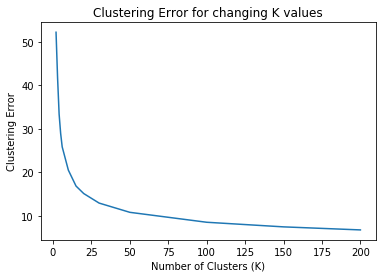

In [12]:
show_result_error(overall_results)

## Obtaining the image for the optimal number of clusters
In order to perform an analysis that is robust to randomness in initialization of centroids, the clısterin model has been trained with the optimal number of clusters (30) to get a final result. The following function performs the training and then predicting the clustering algorithm and resulting image. The clustering error found for the final prediction and the clustered image is given below.

In [18]:
def display_clustered_image(data, k):
    classifier = KMeansCluster(no_of_clusters=k)
    classifier.fit(data)
    error = classifier.evaluate(data)
    print("Error for K = {}: {}".format(k, np.round(error, 4)))
    final_img = classifier.apply_model(data).astype(int)
    visualize_image(final_img, "Clustered Image with K = {}".format(k))

Error for K = 30: 13.0131


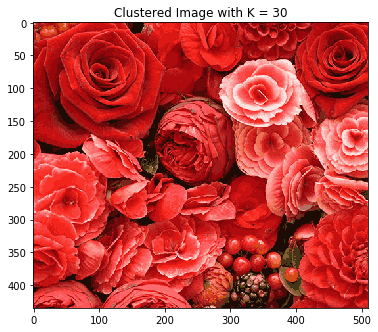

In [22]:
display_clustered_image(sample, 30)